In [105]:
import pandas as pd
import numpy as np

In [106]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
dataset.shape

(10000, 14)

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [109]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [110]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [111]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [112]:
dataset=dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [113]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [114]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

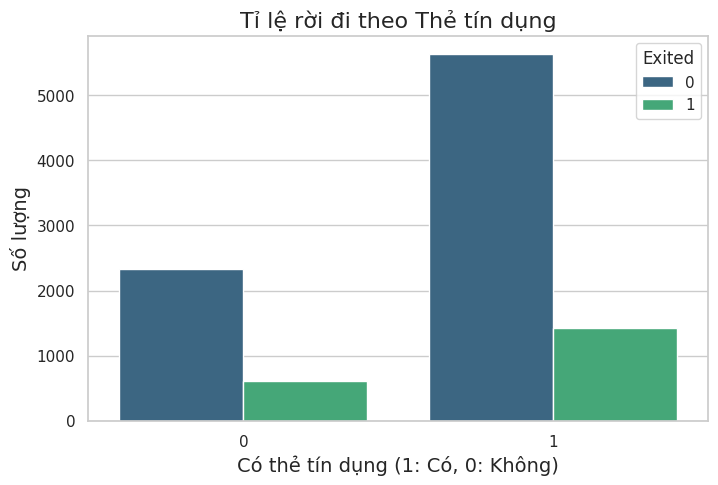

In [187]:
# Câu hỏi 1: Có thẻ tín dụng có ảnh hưởng đến việc khách hàng rời đi không?
plt.figure(figsize=(8, 5))
sns.countplot(x='HasCrCard', hue='Exited', data=dataset, palette='viridis')
plt.title('Tỉ lệ rời đi theo Thẻ tín dụng', fontsize=16)
plt.xlabel('Có thẻ tín dụng (1: Có, 0: Không)', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.show()

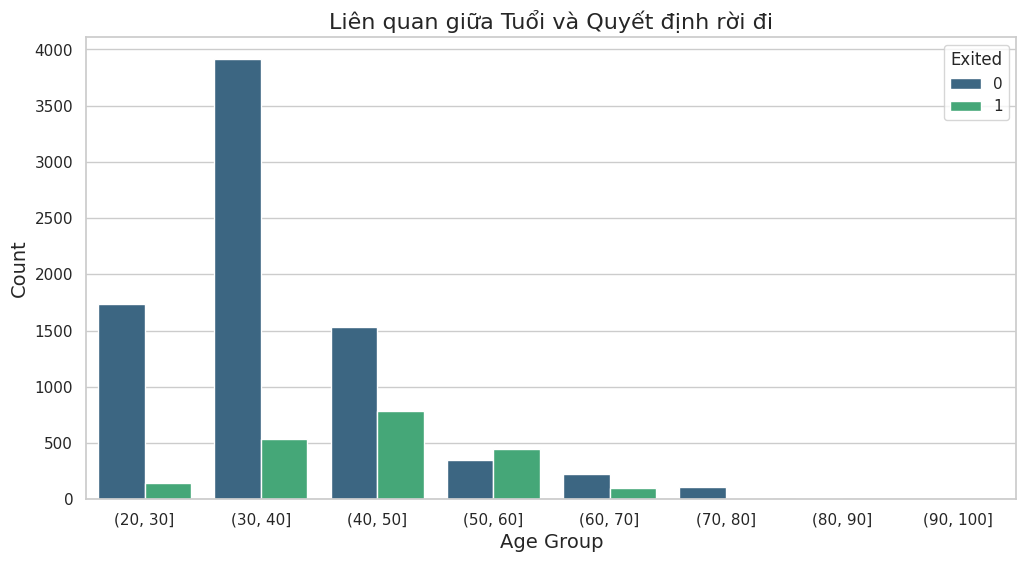

In [209]:
# Câu hỏi 2: Liên quan giữa Tuổi và Quyết định rời đi

# Define age bins
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column 'AgeGroup' based on the defined bins
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=age_bins)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=dataset, palette='viridis')
plt.title('Liên quan giữa Tuổi và Quyết định rời đi', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

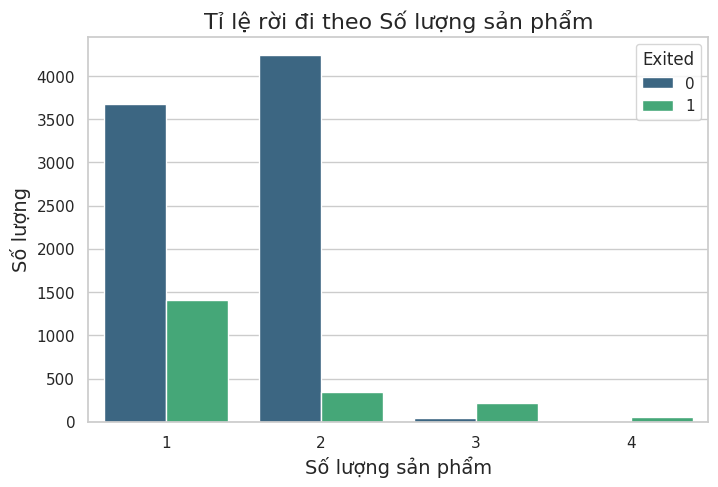

In [195]:
# Câu hỏi 3: Số lượng sản phẩm sử dụng và việc rời đi
plt.figure(figsize=(8, 5))
sns.countplot(x='NumOfProducts', hue='Exited', data=dataset, palette='viridis')
plt.title('Tỉ lệ rời đi theo Số lượng sản phẩm', fontsize=16)
plt.xlabel('Số lượng sản phẩm', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.show()

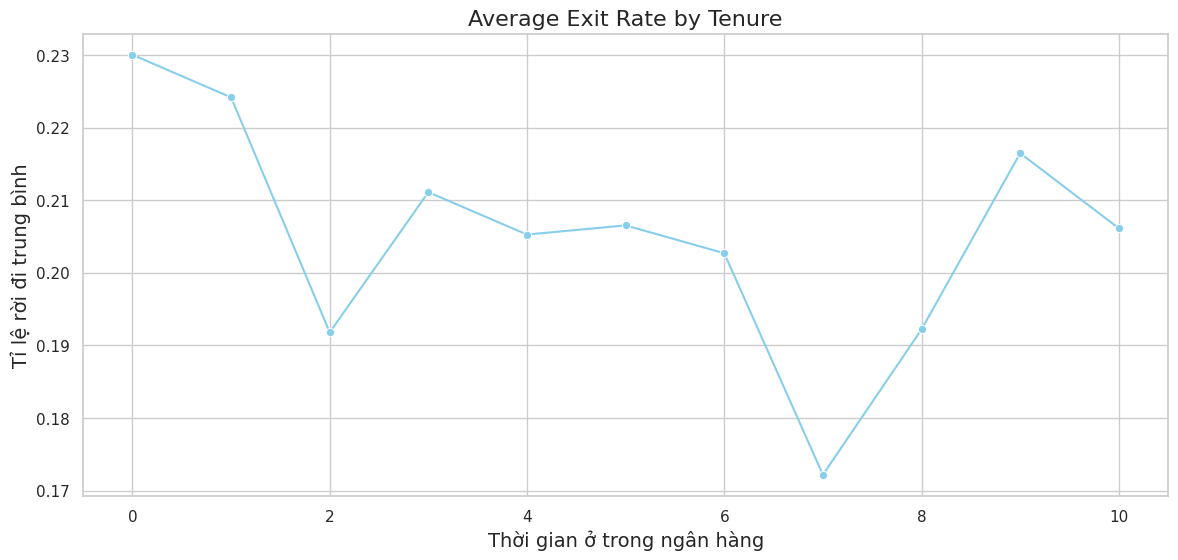

In [214]:
# Tương quan giữa thời gian ở trong ngân hàng và việc rời đi

exit_rate_by_tenure = dataset.groupby('Tenure')['Exited'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='Tenure', y='Exited', data=exit_rate_by_tenure, marker='o', color='skyblue')
plt.title('Average Exit Rate by Tenure', fontsize=16)
plt.xlabel('Thời gian ở trong ngân hàng', fontsize=14)
plt.ylabel('Tỉ lệ rời đi trung bình', fontsize=14)
plt.show()

<ipython-input-198-5cb6f90a9f1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='EstimatedSalary', data=dataset, palette='viridis')


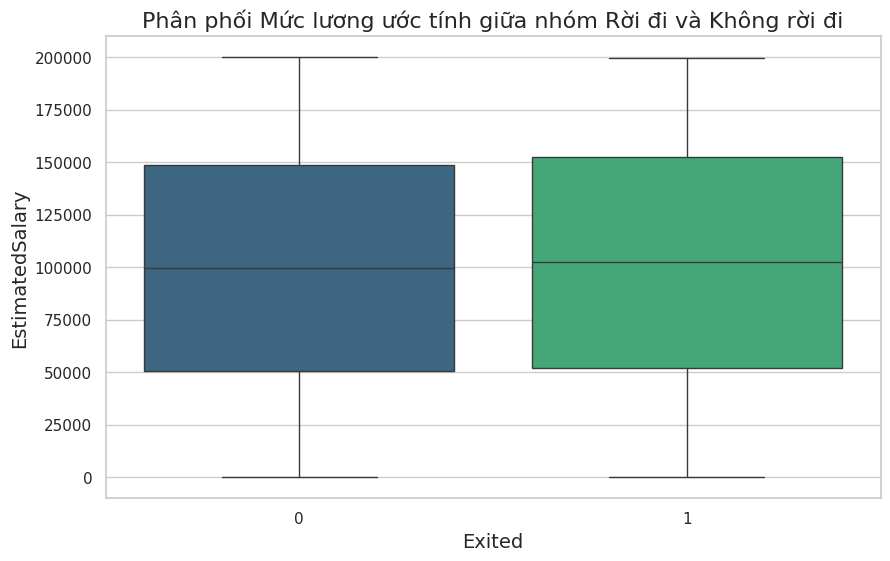

In [198]:
# Câu hỏi Ảnh hưởng của mức lương ước tính đến việc rời đi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=dataset, palette='viridis')
plt.title('Phân phối Mức lương ước tính giữa nhóm Rời đi và Không rời đi', fontsize=16)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('EstimatedSalary', fontsize=14)
plt.show()

<ipython-input-201-b36ec043ab05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y='CreditScore', data=dataset, palette='viridis')


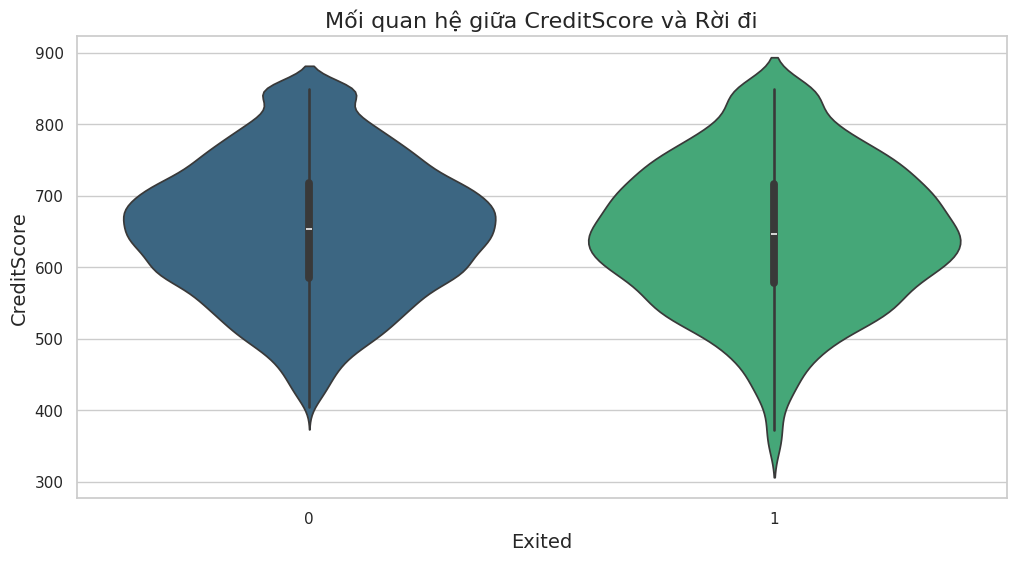

In [201]:
#Mối quan hệ giữa điểm tín dụng và việc rời đi của khách hàng
plt.figure(figsize=(12, 6))
sns.violinplot(x='Exited', y='CreditScore', data=dataset, palette='viridis')
plt.title('Mối quan hệ giữa CreditScore và Rời đi', fontsize=16)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('CreditScore', fontsize=14)
plt.show()

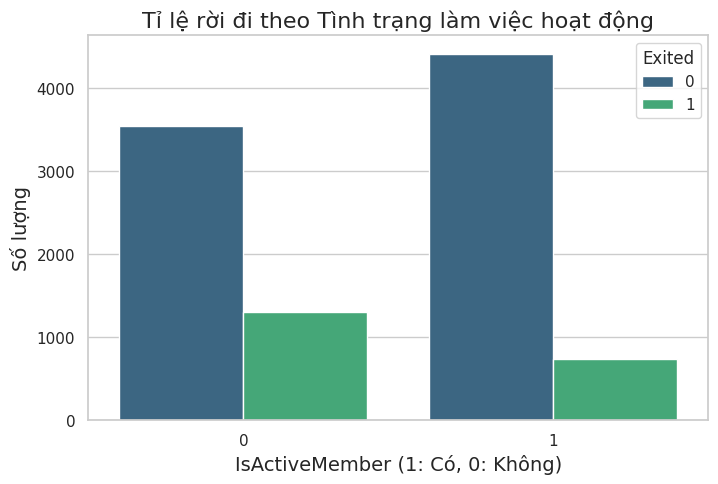

In [200]:
plt.figure(figsize=(8, 5))
sns.countplot(x='IsActiveMember', hue='Exited', data=dataset, palette='viridis')
plt.title('Tỉ lệ rời đi theo Tình trạng làm việc hoạt động', fontsize=16)
plt.xlabel('IsActiveMember (1: Có, 0: Không)', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.show()

<ipython-input-199-be53b91f0eda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=dataset, palette='viridis')


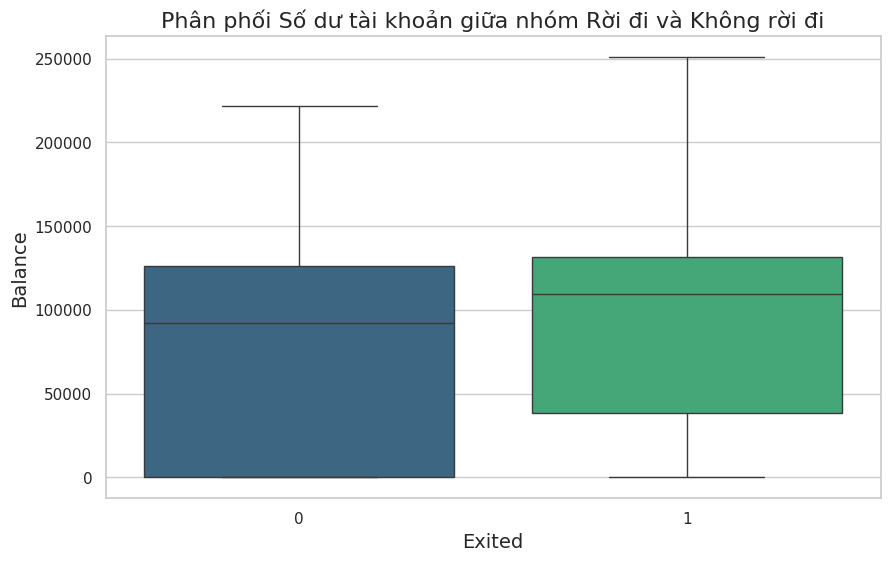

In [199]:

# Câu hỏi : Tương quan giữa số dư tài khoản và quyết định rời đi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=dataset, palette='viridis')
plt.title('Phân phối Số dư tài khoản giữa nhóm Rời đi và Không rời đi', fontsize=16)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.show()

In [190]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

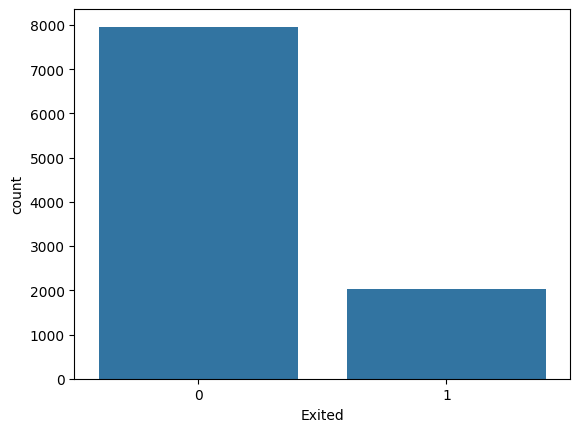

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=dataset)
plt.show()

In [117]:
X = dataset.drop('Exited', axis=1)
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [118]:
X = dataset.drop('Exited', axis=1)
y=dataset['Exited']


In [119]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


In [121]:
X_test.shape

(3186, 11)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


## machine learning

Logistic regression

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log= LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [152]:
y_pred_lg = log.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [127]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [153]:
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tính toán các metrics cho Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)


Accuracy: 0.8685
Precision: 0.7642276422764228
Recall: 0.47837150127226463
F1 Score: 0.5884194053208138


In [147]:
print("Classification Report for Random Forest :")
print(classification_report(y_test, y_pred_rf))

Classification Report for Random Forest :
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [154]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model on the original dataset
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Classification Report for Decision Tree :")
print(classification_report(y_test, y_pred_dt))

Classification Report for Decision Tree :
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.79      0.78      0.78      2000



In [155]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Generate and print the classification report for the original dataset
print("Classification Report for k-Nearest Neighbors :")
print(classification_report(y_test, y_pred_knn))

Classification Report for k-Nearest Neighbors :
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.14       393

    accuracy                           0.76      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.76      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


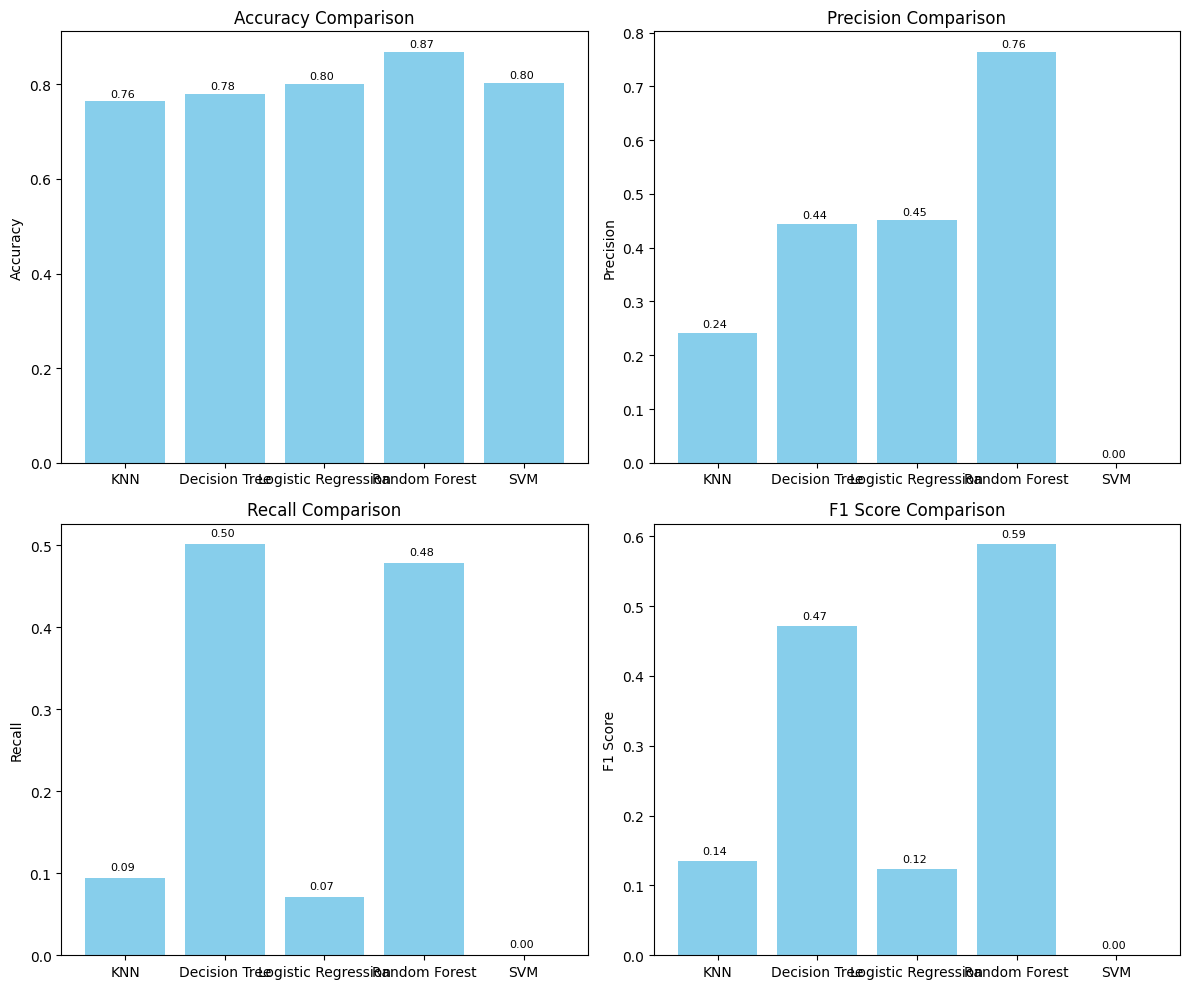

In [173]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Điều chỉnh tên của mô hình
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM']

# Đảm bảo bạn đã tính toán y_pred_knn, y_pred_dt, y_pred_lg, y_pred_rf, y_pred_svm trước khi sử dụng
y_preds = [y_pred_knn, y_pred_dt, y_pred_lg, y_pred_rf, y_pred_svm]

accuracies = [accuracy_score(y_test, y_pred) for y_pred in y_preds]
precisions = [precision_score(y_test, y_pred) for y_pred in y_preds]
recalls = [recall_score(y_test, y_pred) for y_pred in y_preds]
f1_scores = [f1_score(y_test, y_pred) for y_pred in y_preds]

# Chọn metrics bạn muốn so sánh
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracies, precisions, recalls, f1_scores]

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i, ax in enumerate(axes.flatten()):
    bars = ax.bar(model_names, values[i], color='skyblue')
    ax.set_title(f'{metrics[i]} Comparison')
    ax.set_ylabel(metrics[i])

    # Hiển thị giá trị của từng cột trên biểu đồ
    for bar, value in zip(bars, values[i]):
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{value:.2f}', fontsize=8)

plt.tight_layout()
plt.show()


In [174]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tạo mô hình Random Forest
rf = RandomForestClassifier()

# Sử dụng GridSearchCV để tìm ra bộ tham số tốt nhất
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra bộ tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Dùng mô hình với bộ tham số tốt nhất để dự đoán
best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

# In ra các chỉ số đánh giá
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_rf_tuned))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



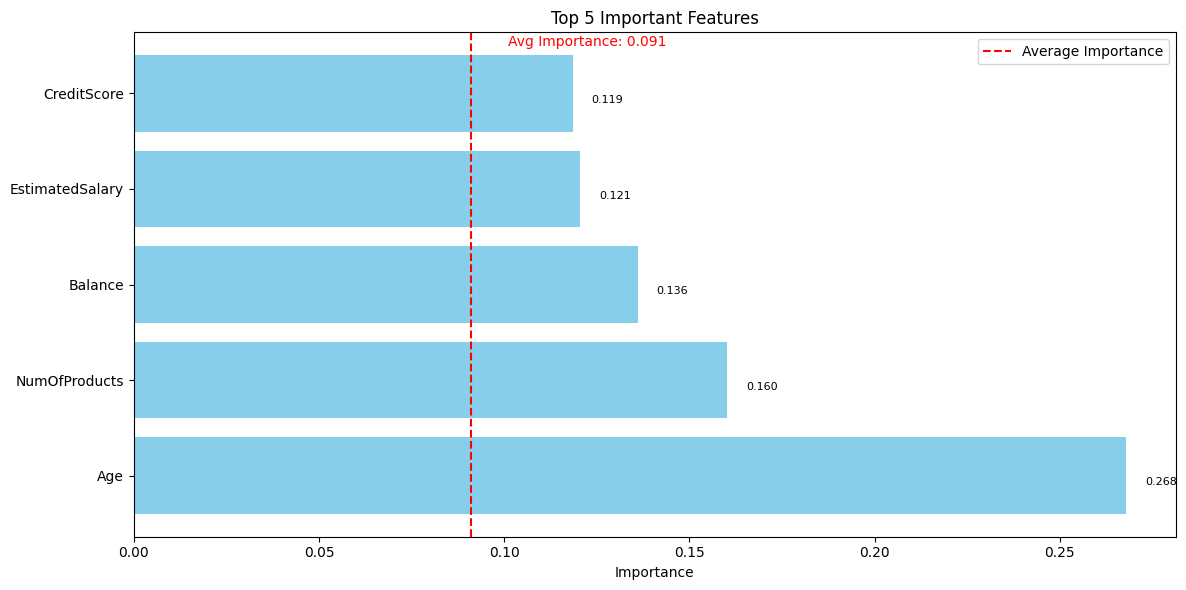

In [180]:

# Vẽ biểu đồ cột cho độ quan trọng của các đặc trưng
plt.figure(figsize=(12, 6))
bars = plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Important Features')

# Vẽ thanh ngang cho giá trị trung bình
avg_importance = feature_importance_df['Importance'].mean()
plt.axvline(x=avg_importance, color='red', linestyle='--', label='Average Importance')

# Hiển thị giá trị trên thanh cột
for bar, value in zip(bars, top_features['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2 - 0.1, f'{value:.3f}', fontsize=8)


plt.text(avg_importance + 0.01, len(top_features) - 0.5, f'Avg Importance: {avg_importance:.3f}', color='red', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()

Top 5 đặc trưng quan trọng theo mô hình Random Forest là:

Age (Tuổi): Độ quan trọng cao nhất, chiếm hơn một phần tỷ trọng lớn trong quyết định của mô hình. Có thể nói rằng, những khách hàng có độ tuổi càng cao có ảnh hưởng lớn đến quyết định rời đi.

NumOfProducts (Số lượng sản phẩm): Đứng ở vị trí thứ hai về độ quan trọng. Việc hiểu và quản lý số lượng sản phẩm sử dụng có thể giúp dự đoán khả năng rời đi của khách hàng.

Balance (Số dư): Số dư trong tài khoản có thể liên quan đến sự hài lòng của khách hàng và ảnh hưởng đến quyết định rời đi.

EstimatedSalary (Lương ước tính): Mặc dù ở mức độ quan trọng thấp hơn so với các đặc trưng khác, nhưng lương ước tính cũng đóng góp vào quyết định. Có thể liên quan đến cảm giác hài lòng và giá trị của dịch vụ.

CreditScore (Điểm tín dụng): Điểm tín dụng thấp có thể là dấu hiệu của tình trạng tài chính không ổn định và có thể dự đoán khách hàng sẽ rời đi.





